In [5]:
import cv2
import numpy as np
import os
import sys
from PIL import Image
from glob import glob
from tqdm import tqdm   
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

import concurrent.futures
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# 이미지 로드 및 전처리 함수 정의
def process_image(file_path):
    # OpenCV로 이미지 로드
    image = cv2.imread(file_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 엣지 감지 및 팽창 (Canny + Dilate)
    edges = cv2.Canny(gray, 50, 150)
    dilated = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=2)

    # 컨투어 검출
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 1:
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        largest_contour = contours[0]
        small_contours = contours[1:]

        # OpenCV 방식으로 마스크 생성 (PIL 대신 OpenCV 사용)
        mask = np.zeros_like(gray, dtype=np.uint8)
        cv2.fillPoly(mask, small_contours, 255)  # 작은 컨투어들만 흰색 채우기

        # NumPy 벡터 연산으로 검정색 마스크 적용 (PIL 대신 NumPy 연산 사용)
        image[mask > 0] = (0, 0, 0)  # 작은 컨투어 부분을 검정색으로 변경

    return image

In [173]:
folder_list=glob('../../data/stroke_CT/**/**/')
for i in tqdm(range(len(folder_list))):
    folder=folder_list[i]

    create_dir(folder.replace('stroke_CT','stroke_CT_preprocessed'))
    img_list=glob(folder+'*.png')
    for j in range(len(img_list)):
        img_path=img_list[j]
        img=Image.open(img_path).resize((512,512))
        img.save(img_path.replace('stroke_CT','stroke_CT_preprocessed'))

100%|██████████| 3097/3097 [41:40<00:00,  1.24it/s]


In [4]:
folder_list=glob('../../data/stroke_mri/**/**/**/')
for i in tqdm(range(len(folder_list))):
    folder=folder_list[i]

    create_dir(folder.replace('stroke_mri','stroke_MRI_preprocessed'))
    img_list=glob(folder+'*.png')
    for j in range(len(img_list)):
        img_path=img_list[j]
        img=Image.open(img_path)
        img=img.resize((256,256))
        img.save(img_path.replace('stroke_mri','stroke_MRI_preprocessed'))


100%|██████████| 3990/3990 [36:19<00:00,  1.83it/s]


In [ ]:
file_list=glob('../../data/2D_CT/**/*.png')



# 병렬 처리 실행
with concurrent.futures.ThreadPoolExecutor() as executor:
    processed_images = list(executor.map(process_image, file_list))


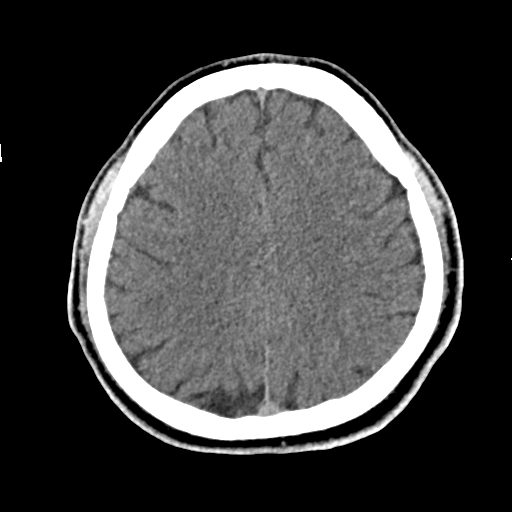

In [ ]:
processed_images[6]
Image.fromarray(processed_images[6]).convert('L').save(file_list[6])